# Include Necessary Libraries

In [55]:
import torch
import model
import librosa
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Audio, display
from torch.utils import data
from dataloader import MtatDataset

# Visualize Different Augmentations

In [56]:
dataset = MtatDataset(split='TEST', input_length=59049,aug_types=(True,True,True))
data_org, _ = dataset[0]
display(Audio(data_org, rate=16000))
data_noise_aug, _ = dataset.get_augmented(0,(True,False,False))
display(Audio(data_noise_aug, rate=16000))
data_timeshift_aug, _ = dataset.get_augmented(0,(False,True,False),timeshift_rate=1.1)
display(Audio(data_timeshift_aug, rate=16000))
data_pitchshift_aug, _ = dataset.get_augmented(0,(False,False,True),pitchshift_rate=5)
display(Audio(data_pitchshift_aug, rate=16000))

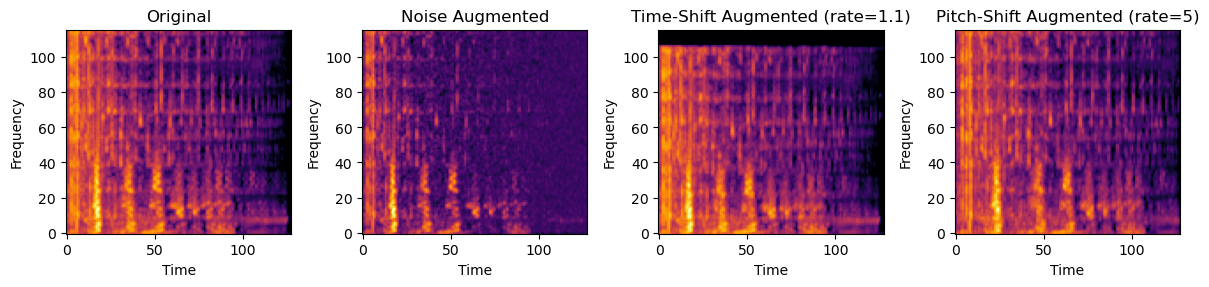

In [57]:
D_org = librosa.feature.melspectrogram(y=data_org, sr=16000, n_mels=128)
log_D_org = librosa.power_to_db(D_org, ref=np.max)

D_noise_aug = librosa.feature.melspectrogram(y=data_noise_aug, sr=16000, n_mels=128)
log_D_noise_aug = librosa.power_to_db(D_noise_aug, ref=np.max)

D_timeshift_aug = librosa.feature.melspectrogram(y=data_timeshift_aug, sr=16000, n_mels=128)
log_D_timeshift_aug = librosa.power_to_db(D_timeshift_aug, ref=np.max)

D_pitchshift_aug = librosa.feature.melspectrogram(y=data_pitchshift_aug, sr=16000, n_mels=128)
log_D_pitchshift_aug = librosa.power_to_db(D_pitchshift_aug, ref=np.max)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 6))
im_org = ax1.imshow(log_D_org.T, cmap='inferno', origin='lower')
ax1.set_title('Original')
ax1.set_xlabel('Time')
ax1.set_ylabel('Frequency')

im_noise_aug = ax2.imshow(log_D_noise_aug.T, cmap='inferno', origin='lower')
ax2.set_title('Noise Augmented')
ax2.set_xlabel('Time')
ax2.set_ylabel('Frequency')

im_timeshift_aug = ax3.imshow(log_D_timeshift_aug.T, cmap='inferno', origin='lower')
ax3.set_title('Time-Shift Augmented (rate=1.1)')
ax3.set_xlabel('Time')
ax3.set_ylabel('Frequency')

im_pitchshift_aug = ax4.imshow(log_D_pitchshift_aug.T, cmap='inferno', origin='lower')
ax4.set_title('Pitch-Shift Augmented (rate=5)')
ax4.set_xlabel('Time')
ax4.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Load the Models

In [58]:
# TODO: load the models and get test accuracy